In [4]:
# Importing libraries 
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.axes._axes import _log as matplotlib_axes_logger
from mpl_toolkits import mplot3d
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score


In [5]:
# Read the data from 'NewData.csv' into a pandas DataFrame
df = pd.read_csv('NewData.csv')

In [6]:
# Extract all columns except the first one and store them in X as a NumPy array
X = df.iloc[:, 1:].values

# Extract the first column and store it in y as a NumPy array
y = df.iloc[:, 0].values

In [7]:
# we split the data into training and testing data 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 2)

In [8]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

# Assuming X_train is your training data
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.fit_transform(X_test)
X_scaled = scaler.fit_transform(X)
# Apply PCA to reduce dimensions
pca = PCA(n_components=2)  # Reduce to 2 components
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.fit_transform(X_test_scaled)
X_pca = pca.fit_transform(X_scaled)

In [9]:
# Code for 3D plot of the data
def plot_3d_plot(X_pca, y):
    r = np.exp(-(X ** 2).sum(1))
    ax = plt.subplot(projection='3d')
    ax.scatter3D(X[:, 0], X[:, 1], r, c=y, s=100, cmap='bwr')
    ax.set_xlabel('X1')
    ax.set_ylabel('X2')
    ax.set_zlabel('y')
    return ax

<Axes3D: xlabel='X1', ylabel='X2', zlabel='y'>

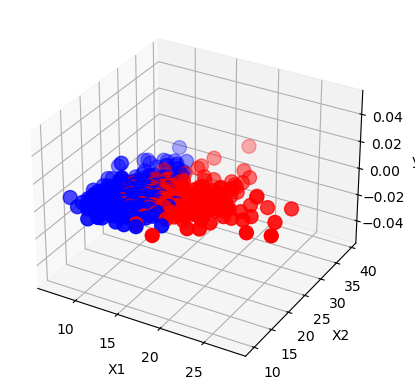

In [10]:
plot_3d_plot(X_pca,y)

In [18]:
# Code for decision plot of data
def plot_decision_boundary(X_train_pca, y, clf):
    X_set, y_set = X_train_pca, y
    
    # Creating a meshgrid based on feature ranges
    X1, X2 = np.meshgrid(np.arange(start=X_set[:, 0].min() - 1,
                                   stop=X_set[:, 0].max() + 1,
                                   step=0.01),
                         np.arange(start=X_set[:, 1].min() - 1,
                                   stop=X_set[:, 1].max() + 1,
                                   step=0.01))
    
    # Contour plot for decision boundary
    plt.contourf(X1, X2, clf.predict(np.array([X1.ravel(), 
                                               X2.ravel()]).T).reshape(X1.shape),
                 alpha=0.75, 
                 cmap='plasma')
    
    # Plot limits
    plt.xlim(X1.min(), X1.max())
    plt.ylim(X2.min(), X2.max())
    
    # Scatter plot for the actual data points
    for i, j in enumerate(np.unique(y_set)):
        plt.scatter(X_set[y_set == j, 0], X_set[y_set == j, 1],
                    color=plt.get_cmap('plasma')(i / len(np.unique(y_set))),
                    label=j)
    
    # Titles and labels
    plt.title('Decision Boundary')
    plt.xlabel('X1')
    plt.ylabel('X2')
    plt.legend()
    
    plt.show()

# Example usage (with a classifier 'clf')
# plot_decision_boundary(X, y, clf)


In [20]:
# Using inbuilt SVM class(linear kernel)
svm1 = SVC(kernel="linear")

# Fitting training data into the model
svm1.fit(X_train,y_train)

# Predicting target values for testing data
y_pred1 = svm1.predict(X_test)

In [22]:
# Using inbuilt SVM class(linear kernel with PCA)
svm2 = SVC(kernel="linear")

# Fitting training data into the model
svm2.fit(X_train_pca,y_train)

# Predicting target values for testing data
y_pred2 = svm2.predict(X_test_pca)

In [24]:
# Finding the accuracy, recall, precision and f1 score for the models
print(accuracy_score(y_test,y_pred1)*100)
print(recall_score(y_test,y_pred1)*100)
print(precision_score(y_test,y_pred1)*100)
print(f1_score(y_test,y_pred1)*100)

94.73684210526315
93.33333333333333
93.33333333333333
93.33333333333333


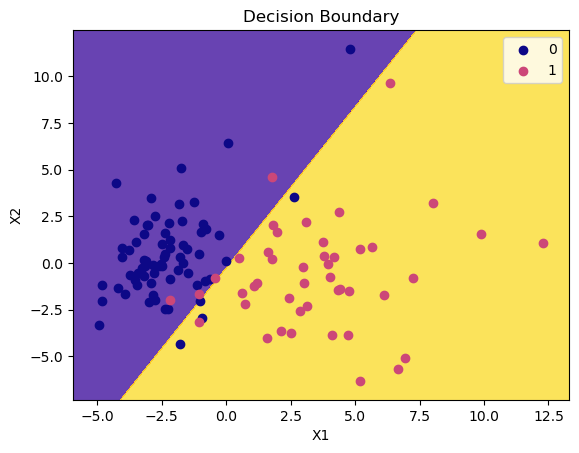

In [26]:
# Plotting decision boundary (linear kernel)
plot_decision_boundary(X_test_pca, y_test, svm2)

In [32]:
# Using inbuilt SVM class(rbf kernel)
svm4 = SVC(kernel="rbf")

# Fitting training data into the model
svm4.fit(X_train,y_train)

# Predicting target values for testing data
y_pred4 = svm4.predict(X_test)

In [34]:
# Using inbuilt SVM class(rbf kernel with PCA)
svm3 = SVC(kernel="rbf")

# Fitting training data into the model
svm3.fit(X_train_pca,y_train)

# Predicting target values for testing data
y_pred3 = svm3.predict(X_test_pca)

In [39]:
# Finding the accuracy, recall, precision and f1 score for the models
print(accuracy_score(y_test,y_pred4)*100)
print(recall_score(y_test,y_pred4)*100)
print(precision_score(y_test,y_pred4)*100)
print(f1_score(y_test,y_pred4)*100)

90.35087719298247
84.44444444444444
90.47619047619048
87.35632183908046


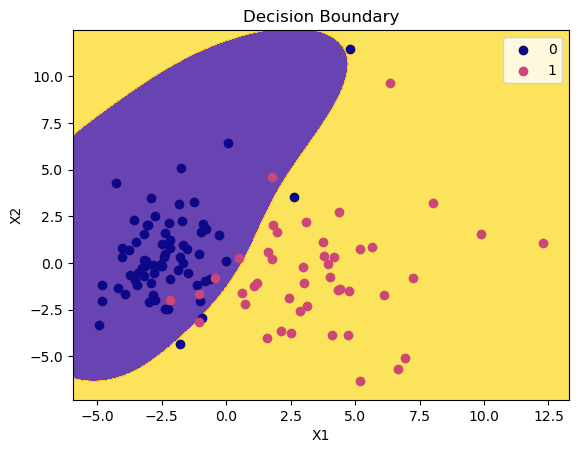

In [40]:
# Plotting decision boundary (rbf kernel)
plot_decision_boundary(X_test_pca, y_test, svm3)

In [43]:
# Using inbuilt SVM class(poly kernel)
svm7 = SVC(kernel="poly")

# Fitting training data into the model
svm7.fit(X_train,y_train)

# Predicting target values for testing data
y_pred7 = svm7.predict(X_test)

In [45]:
# Using inbuilt SVM class(rbf kernel with PCA)
svm8 = SVC(kernel="poly")

# Fitting training data into the model
svm8.fit(X_train_pca,y_train)

# Predicting target values for testing data
y_pred8 = svm8.predict(X_test_pca)

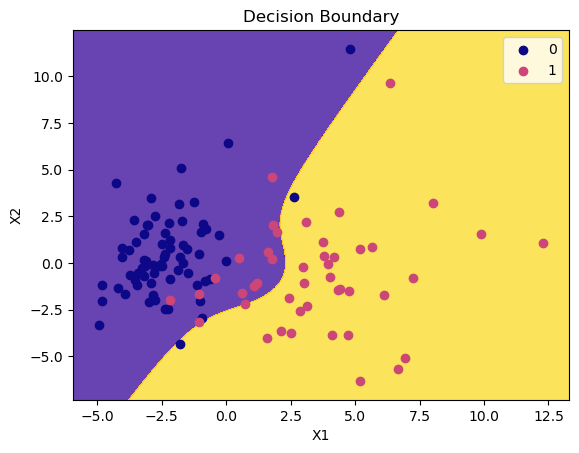

In [47]:
# Plotting decision boundary (rbf kernel)
plot_decision_boundary(X_test_pca, y_test, svm8)

In [48]:
# Classifier made from scratch
class SVM:
    def __init__(self, learning_rate=0.001, alpha=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.alpha = alpha
        self.epochs = epochs
        self.w = None
        self.b = None

    def fit(self, X, y):
        n_samples, n_features = X.shape
        y_ = np.where(y <= 0, -1, 1)  # Convert labels to -1 and 1

        # Initialize weights and bias
        self.w = np.zeros(n_features)
        self.b = 0

        for _ in range(self.epochs):
            for idx, x_i in enumerate(X):
                condition = y_[idx] * (np.dot(x_i, self.w) - self.b) >= 1
                if condition:
                    self.w -= self.learning_rate * (2 * self.alpha * self.w)
                else:
                    self.w -= self.learning_rate * (2 * self.alpha * self.w - np.dot(x_i, y_[idx]))
                    self.b -= self.learning_rate * y_[idx]

    def predict(self, X):
        approx = np.dot(X, self.w) - self.b
        return np.sign(approx)


In [49]:
# Using inbuilt SVM class(self made SVM with PCA)
scratch_classifier = SVM(learning_rate = 0.001, alpha = 0.1, epochs = 1000)

# Fitting training data into the model
scratch_classifier.fit(X_train_pca,y_train)

# Predicting target values for testing data
y_pred9 = scratch_classifier.predict(X_test_pca)

In [50]:
def accuracy(y_true, y_pred):
    # Ensure labels are in the same format (-1 and 1)
    y_true = np.where(y_true <= 0, -1, 1)
    y_pred = np.where(y_pred <= 0, -1, 1)

    correct_predictions = np.sum(y_true == y_pred)
    accuracy_value = correct_predictions / len(y_true)
    return accuracy_value * 100

In [51]:
# Calculating accuracy of SVM coded from scratch
accuracy(y_test,y_pred9)

93.85964912280701

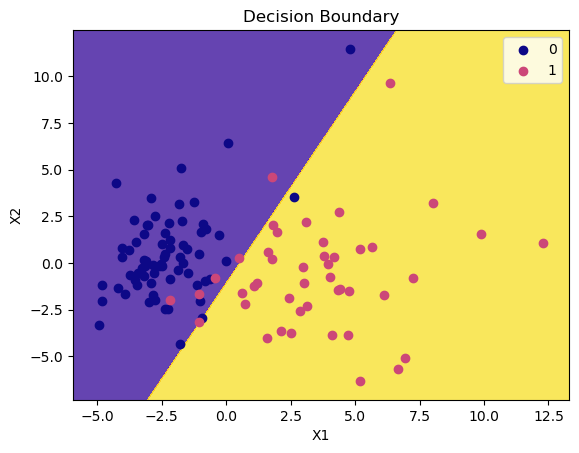

In [52]:
# Plotting decision boundary (inuilt kernel)
plot_decision_boundary(X_test_pca, y_test, scratch_classifier)